# Basic Statistics

#### Prerequisite:
- None


#### We will learn:

- Random variable (RV), how to generate random numbers in $\texttt{python}$
- Probability distribution function (PDF)
- Histograms
- Basic statistics (mean, median, standard deviation)


#### We will use them to understand
- Detectors and astronomical images (see Lecture xx)
- Calibration frames: bias, flat field, dark


In [59]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

## Random variable, histogram, probability

Let's look at a cubic dice with faces numbered from 1 to 6. When you roll a dice once, you write down the number on the top (e.g., 4). Then when you roll it again, you might see a different number (e.g., 2). You can repeat this many times, and you will probably see all six numbers. An event such as a dice roll is called a **random event**. The outcome of a dice roll is a **random variable**. Let's denote the random variable of a dice roll as $X$, so the value of $X$ must be in $\{1, 2, 3, 4, 5, 6\}$. One must realize that a random variable is a variable -- it can have different values $x$ when repeating the random event. 


Let's use Python to generate random numbers to get a sense of rolling a "fair" dice. `np.random.randint` (or `scipy.stats.randint`) provides a nice function to generate a random variable that is an integer between 1 and 6.

In [62]:
# run this cell many times, as if you are rolling a dice
print(np.random.randint(low=1, high=6+1)) # notice that `high` is one plus the highest number of our random variable. This trick is common in python.

3


Now you see what a random variable looks like. Shall we roll a dice for 100 times and record all the outcomes?

In [104]:
N_roll = 100
outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

In [105]:
print(outcomes)

[1 4 6 2 5 3 2 1 3 4 2 6 5 2 2 6 3 4 6 4 6 2 4 3 3 5 4 5 6 1 3 2 3 1 2 4 4
 3 2 6 2 5 1 4 3 2 4 3 4 3 4 6 5 1 4 1 4 2 5 6 5 1 2 3 5 6 2 2 1 6 2 2 3 1
 1 6 2 3 4 5 1 3 6 3 2 5 1 4 2 1 6 1 3 5 4 5 3 4 4 2]


Here we use a list `outcomes` to store the outcome from each roll. The `for` loop is used to repeat the dice roll for `N_roll` times. It is a good practice to define variables like `N_roll` in your code, because if you want to change the number of dice rolls to 10000, you can just change `N_roll = 10000` without touching other code. The benefit of this practice will manifest itself as we go on in this course. Also, it is usually more convenient to work with numpy arrays than python lists. 

Our next task is to check the frequency of the outcome being each number between 1 and 6. 

In [106]:
np.sum(outcomes == 1) # this shows the frequency of "1" in our 100 dice rolls

15

In [107]:
np.sum(outcomes == 4) # this shows the frequency of "1" in our 100 dice rolls

19

In [108]:
# Let's use the for loop again
for i in range(1, 6+1):
    print(f'The frequency of {i} is', np.sum(outcomes == i))

The frequency of 1 is 15
The frequency of 2 is 21
The frequency of 3 is 18
The frequency of 4 is 19
The frequency of 5 is 13
The frequency of 6 is 14


Again, `numpy` provides shortcut functions to do this:

In [109]:
values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)
print(list(zip(values, counts)))

[1 2 3 4 5 6] [15 21 18 19 13 14]
[(1, 15), (2, 21), (3, 18), (4, 19), (5, 13), (6, 14)]


Histogram is a good tool to visualize this result

Text(0.5, 1.0, 'Number of rolls: 100')

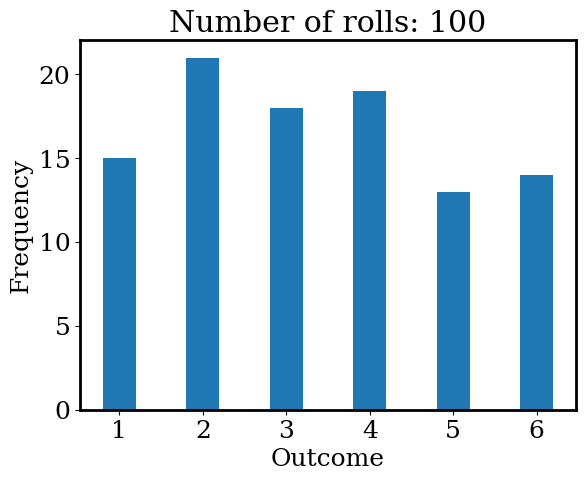

In [111]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}')

Is the dice fair? Seems no from the figure above, because the frequencies of all numbers are not the same. This contradicts our assumption of using `np.random.randint` where the random variable should be random. What's happening here?

Let's increase `N_roll` to 10000:

[1 2 3 4 5 6] [1650 1677 1667 1689 1651 1666]


Text(0.5, 1.0, 'Number of rolls: 10000')

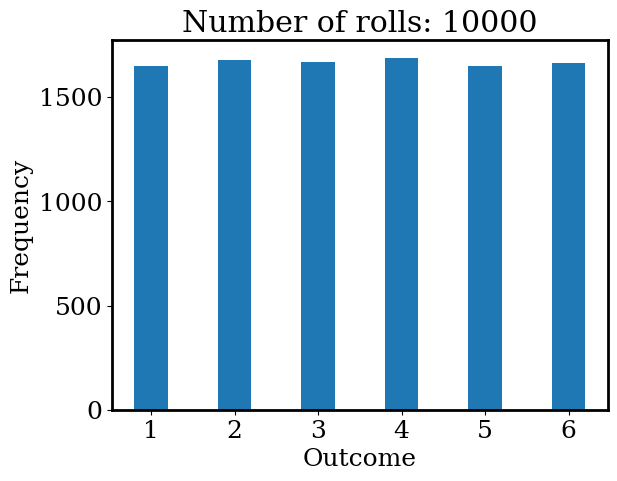

In [112]:
N_roll = 10000

outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)

plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}')

Okay! Now the dice looks much fairer! This exercise shows us an important thing: the conclusion is often subject to statistical uncertainty when the sample size is too small.

Let's calculate the chance of the outcome being each number:

In [116]:
chances = counts / N_roll
print(chances)

[0.165  0.1677 0.1667 0.1689 0.1651 0.1666]


If the dice is fair, the chances should all be 1/6 = 0.1667. In math, this "chance" is referred to as "probability". In `plt.hist` function, you can turn on `density=True` to plot the "normalized frequency" (each frequency divided by the sum of all frequencies, i.e., total number of rolls). The normalized frequencies are very close to the probability 1/6 (red dashed line).

Text(0.5, 1.0, 'Number of rolls: 10000')

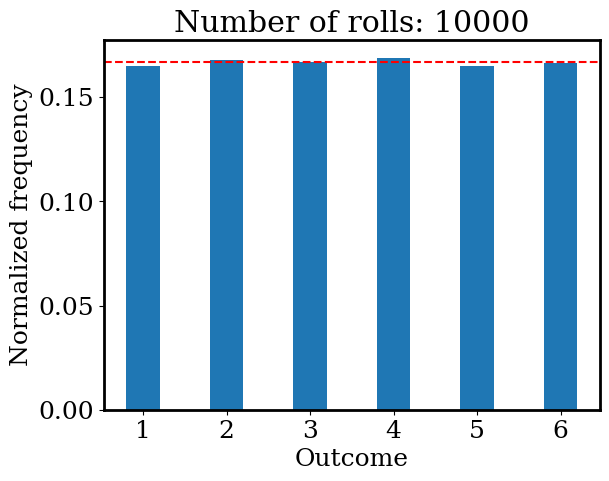

In [121]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4, density=True)
plt.axhline(1/6, c='r', ls='--')
plt.xlabel('Outcome')
plt.ylabel('Normalized frequency')
plt.title(f'Number of rolls: {N_roll}')

## Mean, median, standard deviation